<a href="https://colab.research.google.com/github/Faitsu/CNAssignment3/blob/main/AI_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Intelligence: Big Transfer Project
by Erica Chou, Max Christ, and Yiwei Zhang




# Summary of Transfer Learning
 Transfer Learning is an optimization method that is widely used in machine learning due to its ability to decrease the amount of both overall time and specific data needed to train a model. Transfer Learning does this simply by using a model trained with a very large generic dataset to train smaller datasets for more specific tasks.  Because of the benefits this provides, this basic method has been used in many fields of machine learning such as natural language processing, image classification, and video concept classification. (Khoshgoftaar et al., 2016) Transfer learning has also been studied and built upon to improve the performance of models. An example of this can be seen with the approach known as Big Transfer Learning, which has shown to have excellent performance on many different tasks. 


Generally, Transfer Learning is composed of two phases, and these phases are defined in the Big Transfer paper as the “pre-training and fine-tuning phases”.(Kolesnikov et al., 2019). The pre-training phase consists of gathering a large amount of source data from a supervised data set such as Imagenet and pre-training these sets using a more generic model. The pre-trained models that come out from these initial pre-training datasets can then be used in tandem with a smaller amount of data to finetune the weights on a more specific task. The data from these tasks can then be used again in the future to train similarly related tasks. In summary, we use information from a more general but related task to train for a new task.

According to Pan in his paper, we can also formally define Transfer Learning using this definition:

Given a source domain $D_S$ and learning task $T_S$, a target domain $D_T$ and learning task $T_T$ , transfer learning aims to help improve the learning of the target predictive function $f_T(\cdot)$ in $D_T$ using the knowledge in $D_S$ and $T_S$, where $D_S \neq D_T$ , or $T_S \neq T_T$  . (Pan,2009)

Being able to use and adapt large and generic datasets to smaller tasks is important  because being able to reuse the same large dataset for training allows us to circumvent the problem of having too little specific data for machine learning tasks that require more data. As the field of Machine Learning grows, more tasks require specific data that might be too expensive, rare, or inaccessible. (Khoshgoftaar et al., 2016) Therefore, being able to use very large but generic datasets to train these types of specific tasks allows networks to have better performance on these tasks due to having easier access to these larger generic datasets. This also allows us to reduce the amount of specific data needed to get good results on our models. 

Though this method is very powerful, Transfer Learning cannot be used in every situation. For example, there would be no benefits to using Transfer Learning if the larger pre-training dataset and smaller fine-tuning dataset must be similar in some way or the larger pre-training dataset has to be much larger than the fine-tuning set. Furthermore, if a model size used for pre-training is much smaller than the dataset being used on it or if there is not enough time to train the model, there would be limited or even negative benefits to the model’s performance. (Kolesnikov et al., 2019)

As the field of Machine and Deep Learning grows, Transfer Learning will probably become more popular. The combination of the method’s simplicity and the need for data as tasks our models become more specialized will make Transfer Learning more useful over time. Moreover, there is much research going into using concepts of Transfer Learning to increase the performances in our learning models, as seen in the Big Transfer research. Overall, Transfer Learning is a very important concept in Machine Learning for efficiently providing models with the data they need to have good performance.


# References:
1.  Pan, Sinno Jialin, and Qiang Yang. "A survey on transfer learning." IEEE Transactions on knowledge and data engineering 22.10 (2009): 1345-1359.
2.   A. Kolesnikov et al., Big Transfer (Bit): General Visual Representation Learning, 2019, [online] Available: https://arxiv.org/abs/1912.11370.
3.   Weiss, K., Khoshgoftaar, T.M. & Wang, D. A survey of transfer learning. J Big Data 3, 9 (2016). https://doi.org/10.1186/s40537-016-0043-6



# Architechural Improvements of BiT on ResNet-152 V1

Big Transfer, or BiT, is not necessarily a huge innovation in Neural Network technology, but rather a standardization of current techniques to yield a simple and streamlined process for applying Transfer Learning to new datasets. BiT makes minor improvements to the underlying ResNet architecture to accomplish this, as well as outlining a heuristic rule for selecting the correct hyper-parameters. Besides those improvements, the main innovations of BiT is it’s preselection of most hyper-parameters, its preselection of pre-training datasets, and its ability to be a cut-and-paste style protocol for performing Transfer Learning in visual tasks.

That being said, there are three main architectural improvements to ResNet-152 in the Upstream (pre-training) component of BiT. The first improvement, if it can be considered one, is that it provides 3 different models to compensate for the scale of a given dataset. The authors refer to this as scale (Kolesnikov et al., 2019). There is a small, medium, and large network, and using each of these on the corresponding sized transfer dataset will improve performance when compared with a design that only has a single model. 

The second architectural improvement is that, “every hidden layer [was] widened by a factor of four,” (Kolesnikov et al., 2019). This modification to ResNet-152 is referred to as ResNet-152x4. Widening the hidden layers was shown to greatly improve performance, as seen in figure 5 of the BiT paper (Kolesnikov et al., 2019).  The third and most dramatic architectural improvement, was the switch from Batch Normalization (BN) to Group Normalization (GN) and Weight Standardization (WS) across all models. ResNet-152 typically uses Batch Normalization, however, the designers of BiT found that “due to the requirement to update running statistics, BN is detrimental for transfer,” (Kolesnikov et al., 2019). Additionally, they discovered that “BN performs poorly or incurs inter-device synchronization cost,” when “training large models with small per-device batches,” (Kolesnikov et al., 2019). These downsides are what encouraged the authors of the BiT paper to instead use GN with WS. 

The architectural improvement unique to the Downstream (transfer) component of BiT is what is called BiT-HyperRule (Kolesnikov et al., 2019). This is defined as a heuristic rule which determines how to set the only three variable hyper-parameters. All of the other hyper-parameters are predetermined in the BiT scheme. BiT-HyperRule is a function of the dataset size, and the image resolution. It uses this information to set the three parameters, which are “training schedule length, resolution, and whether to use MixUp regularization,” (Kolesnikov et al., 2019). The purpose of this rule is to eliminate the need to perform costly hyper-parameter tunings for all hyper-parameters each time transfer is started on a new task. The BiT-HyperRule cuts down significantly on these costs, because it is a simple deterministic function of two simple parameters. Therefore, it helps reduce the transfer time for any new tasks. 

The first input to BiT-HypeRule is the size of the dataset. BiT-HypeRule then defines three categories for which a dataset will be classified: small is anything less than 20k datapoints,  medium is between 20k and 500k datapoints, and large is anything above 500k datapoints. The first hyper-parameter, schedule length, is then chosen based on the previous classification: “500 steps on small tasks, for 10k steps on medium tasks, and for 20k steps on large tasks” (Kolesnikov et al., 2019). The second hyper-parameter, MixUp, is also chosen using the dataset scale classification: “MixUp [is used] with α = 0.1, for medium and large tasks,” (Kolesnikov et al., 2019) but not for small tasks. The final hyper-parameter in BiT-HyperRule is the resolution, and it is tuned in the following way: “We resize input images with area smaller than 96 × 96 pixels to 160 × 160 pixels, and then take a random crop of 128 × 128 pixels. We resize larger images to 448 × 448 and take a 384 × 384-sized crop,” (Kolesnikov et al., 2019).

All of the improvements to the underlying ResNet-152 architecture previously mentioned are helpful in either improving the performance or reducing the computation time of Transfer Learning. However, as stated earlier, all of the improvements aren’t necessarily novel in and of themselves. BiT is more impressive in the sense that it standardizes pre-training sets and hyper-parameter values to produce a generic scheme for Transfer Learning in any visual task. 

# References
1. A. Kolesnikov et al., Big Transfer (Bit): General Visual Representation Learning, 2019, [online] Available: https://arxiv.org/abs/1912.11370.







 

# A Comparison of GN, WS, and BN
In the Big Transfer paper (abbreviated as BiT), the BiT research team applied Group  Normalization (GN) and Weight Standardization (WS) to all convolutional layers to  optimize their BiT convolutional neural network (CNN) model when pre-learning.  Compared to the commonly used Batch Normalization (BN), the combination of GN  and WS had a better performance with BiT because of its higher accuracy  and faster learning speed. In this article, we will explain Group  Normalization, Weight Standardization and Batch Normalization with common  language and then compare the difference between them. 
Basic Statistic  
Before jumping into the context of CNN, we will first introduce some basic statistical ideas: Normalization and Standardization. Although they have different names,  Normalization and Standardization share a similar process: rescale a group of data into a certain format. Since the process is out of scope from the main theme of the article, we will focus on the result of the two processes. Simply, Normalization rescales all values into a certain range. Standardization rescales data to have a mean of 0 and standard  deviation of 1. In other words, Standardization is a special case of Normalization. 

*CNN Introduction* 

BiT team conducted a research on the pre-train of image classification CNN. Here,  we will start a brief introduction of the part of CNN related to Batch Normalization, Group  Normalization  and WS.  The architecture of CNN includes three layers: the input layer, hidden layer, and  output layer. The input layer refers to the input data, and the output layer is a single layer that makes predictions based on the feature of input data. However, the hidden layer is composed of many convolutional layers that extract features from the input data. During the training process of CNN, the input data comes from the training set: a  set contains a large number of samples. Because the CNN can only understand and  process per number, the samples are in the format of a 3D array, or a combination of  matrices. A single matrix represents a certain feature of the sample and is named as  channel. This format will remain the same as the data transfer between the  convolutional layers, except the size of matrices and the number of channels may vary.  The convolutional layers use kernels to extract features from input data. One kernel  can extract a certain feature from the input data. To extract different features, one  convolutional layer will apply many kernels to the input data, and the number of kernels  used determines the number of channels of output data of the layer.  A kernel is a 3D array with weights that share the same number of channels with the input  data, and this array works a filter side through the matrices of input data. The output kernel is  a matrix that has some similarity to the kernel. The figure below shows the output matrices of  different one channel kernels applied to the input data.






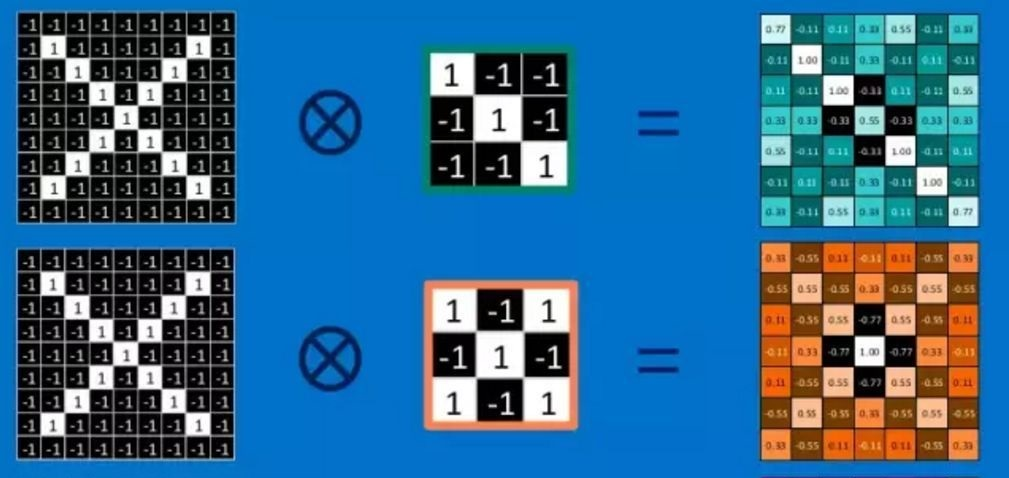

*Batch Normalization*  

A batch is a group of samples that are read in from the training set to CNN one at a  time. The batch size is a hyperparameter given when establishing the CNN and determines the number of samples in the batch.  
Batch Normalization calculates the mean of all data in the same channel along the  batch, and then rescales the mean to 0 while regulating the gradient and improving the  efficiency of training. The performance of BN is causally related to the batch size.  When the batch size is the same as the size of the training set, the mean calculated is the same as  the mean of all data in the same channel. The problem is: if the batch size is too small,  then the calculated mean will be located far away from the real mean and will cause the normalization to be inefficient or even decrease the efficiency.  
Unfortunately, the BiT team uses many machines to run the training process  parallelly, resulting in the batch size of a single machine being smaller than the minimum  threshold of BN of maintaining its performance. This phenomena causes the decrease  of the prediction accuracy as the BiT team showed in their paper. Therefore, the  BiT team applied  an alternative method of Normalization. 

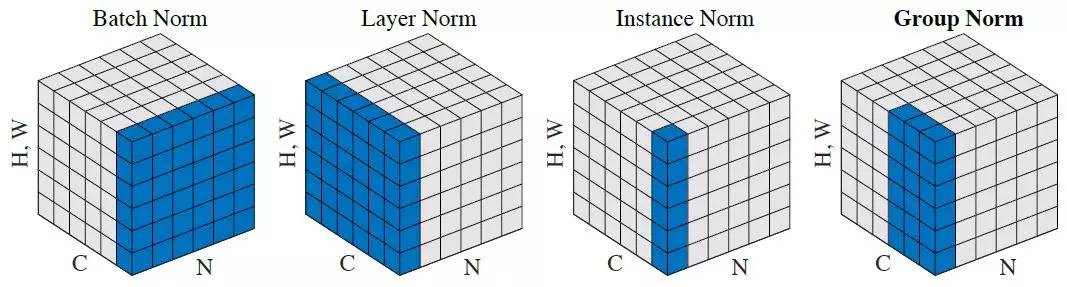

*Group Normalization*

Figures of different normalization method[1]
The figure above shows some alternative methods of normalization. We will start  with Layer Normalization. Different from BN, Layer Normalization normalizes data  of all channels in a single sample. This means its performance is totally independent  from the batch size. Instant Normalization, on the other hand, normalizes only one  channel in a sample. However, both Layer Normalization and Instant Normalization have their drawbacks. As mentioned before, a channel represents an extracted feature, and  the distribution of data is a characteristic of the feature. Therefore, normalization in all channels will  interrupt this distribution. In other words, Layer Normalization will interrupt features  that are not or barely related, causing underfitting. In contrast, Instant Normalization  emphasizes every single feature too much and causes overfitting. 
Group Normalization is a combination of Layer Normalization and Instant  Normalization: it normalizes a group of channels and iterates through all the channels in one sample. Therefore, it  inherits the independence from the batch size in  LN and IN, and it also avoids their flaw to some extent. This is because GN only normalizes a certain number of  channels, which prevents interrupting unrelated data while emphasizing only one feature. The  group size, as a hyperparameter, is defined by the model designer. A fine determined group  size can amplify the advantage of Group  Normalization. If the group size equals the number of channels,  Group  Normalization becomes LN. If the group size equals 1, Group  Normalization is the same as IN. 
Group  Normalization shows a better performance in a small batch  size and is designed better compared to LN and IN. This increase in performance is the reason why the BiT team chose to use the normalization method in their model. However, Group  Normalization is not enough. To fully optimize BiT we must understand Weight Standardization.


*Weight Standardization*

The main difference of Weight Standardization compared to BN and Group  Normalization is the  object it is applied to: the kernels instead of input data. As its name suggested, Weight Standardization  standardizes the weight in kernels.  
Noticeably, Weight Standardization is a technique that extends from and further improves Group  Normalization.  Therefore, Weight Standardization is always used with Group  Normalization. By performing the  standardization of weights in kernels, Weight Standardization reduces the Lipschitz constants of the loss  and the gradients, which means their changes are more likely within a smaller range.  This enlarges the step size as the change of loss and gradients is more stable. As a result,  Weight Standardization, together with Group  Normalization, is able to accelerate the training process. 

# Reference  
1. Group Normalization by Yuxin Wu and Kaiming He https://openaccess.thecvf.com/content_ECCV_2018/papers/Yuxin_Wu_Group_ Normalization_ECCV_2018_paper.pdf 
2. Weight Standardization by Siyuan Qiao, Huiyu Wang, Chenxi Liu, Wei  Shen, Alan Yuille. https://www.groundai.com/project/weight-standardization/1

# MixUp Regularization

MixUp Regularization is a technique that was developed by Hongyi Zhang in order to make deep neural networks more accurate when dealing with examples that are slightly outside of the training distribution (Zhang et al., 2017). These types of examples often cause neural networks to behave in unexpected ways, and for this reason they are often referred to as adversarial examples (Szegedy et al., 2014). The authors the method describe MixUp as “a form of data augmentation that encourages the model f to behave linearly in-between training examples,” (Zhang et al., 2017).

Essentially, MixUp creates virtual training examples by interpolating between existing training examples. Using these virtual examples during training then helps to generalize the model so that it isn’t overly fit to the training data. One of the goals of MixUp was to help create models that generalized rather than memorized the training data. In other words, MixUp increases the performance of the model when it encounters examples that are only slightly different from the training examples.

When creating the virtual examples for training, MixUp randomly chooses two examples from the training set, which we will call $(x_{i},y_{i})$ and $(x_{j},y_{j})$. The MixUp hyper-parameter called $\alpha$ is then chosen, and represents “the strength of interpolation between feature-target pairs” (Zhang et al., 2017). The MixUp hyper-parameter is used to define $\lambda$, which is a random value in $[0,1]$ on the beta distribution. In other words $\lambda$ ~ $Beta(\alpha , \alpha)$ where $\alpha \in (0, \infty)$. The virtual examples $(\hat{x},\hat{y})$ are then constructed using the following formulas: 

$\hat{x} = \lambda x_{i} + (1-\lambda)x_{j}$

$\hat{y} = \lambda y_{i} + (1-\lambda)y_{j}$

However, the performance can greatly depend on the choice of hyper-paremeter being used in MixUp. The designers of MixUp found that $\alpha \in [0.1,0.4]$ led to the best results in their experiments (Zhang et al., 2017). They also found that larger values of $\alpha$ caused under-fitting, and longer runs with larger models increased the performance (Zhang et al., 2017). Therefore, it is important to choose $\alpha$ correctly when tuning. In fact, the authors of the Big Transfer (BiT) paper found that MixUp was only helpful when using medium to large sized models (Kolesnikov et al., 2019). This aligns with the findings of the original MixUp paper, because they saw larger performance gains for larger models, as previously mentioned. Interestingly, they also found that MixUp was not helpful during pre-training, but was helpful during the transfer phase (Kolesnikov et al., 2019). 

Overall, MixUp is useful tool for Convolutional Neural Networks to overcome the challenges of adversarial examples and memorization. Additionally, due to its simplicity, the implementation in PyTorch is only a few lines of code (Zhang et al., 2017). It follows that the technique does not add very much extra computation time when added into the model. Further research has also been conducted which led to the discovery that MixUp regularization can be susceptible to what is called manifold intrusion (Guo et al,. 2018). This means that the disparity between the synthesized labels on the virtual examples and the labels on the original training examples can lead to under-fitting. Therefore, a newer technique with increased accuracy was developed in order to alleviate these shortcomings, and it is called AdaMixUp. Although MixUp has it advantages, it seems that AdaMixUp might be the method of choice for CNN design in the near future. 

# References
 

1.   Hongyu Guo, Yongyi Mao, and Richong Zhang. Mixup as locally linear out-of-manifold regularization. arXiv preprint arXiv:1809.02499, 2018.
2.   A. Kolesnikov et al., Big Transfer (Bit): General Visual Representation Learning, 2019, [online] Available: https://arxiv.org/abs/1912.11370.
3.   Szegedy et al. (2014) C. Szegedy, W. Zaremba, I. Sutskever, J. Bruna, D. Erhan, I. J. Goodfellow, and R. Fergus. Intriguing properties of neural networks. ICLR, 2014.
4.   Zhang, H., Cisse, M., Dauphin, Y.N., Lopez-Paz, D.: mixup: Beyond empirical risk minimization. In: ICLR (2017)







# Big Transfer Implementation

Link to our Big Transfer Implementation Notebook:
https://colab.research.google.com/drive/1kwgp8DQ0hQumc9Lw5-b5R-6YJ7puWgDK?usp=sharing

Results from our code:

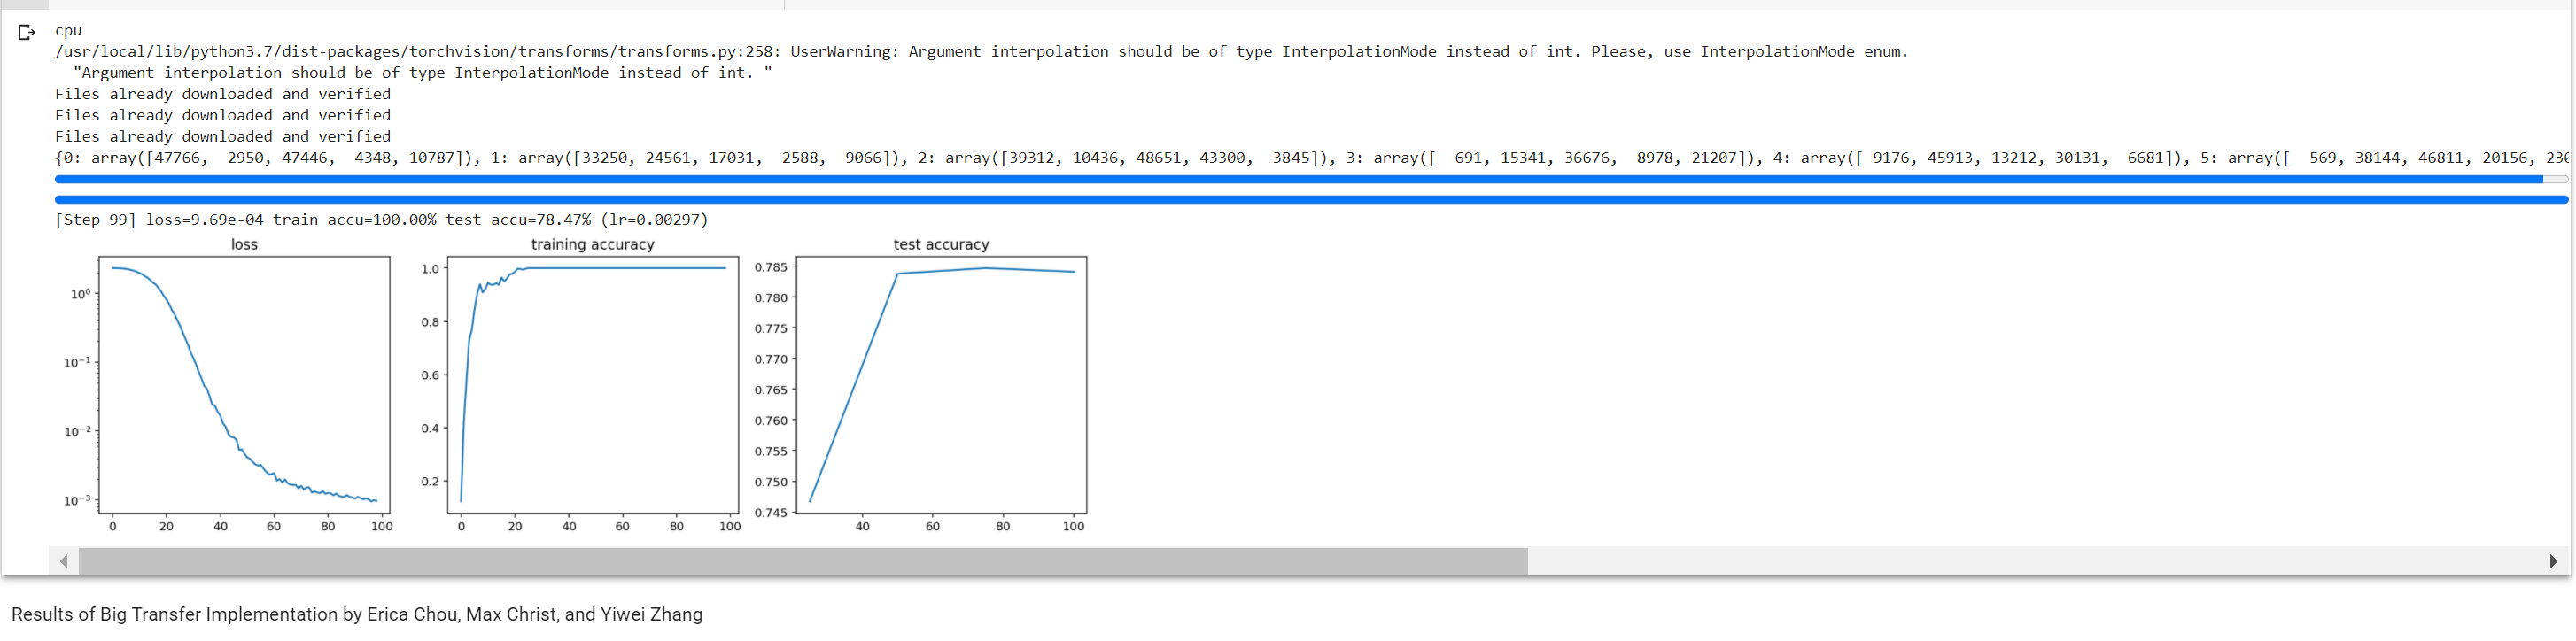

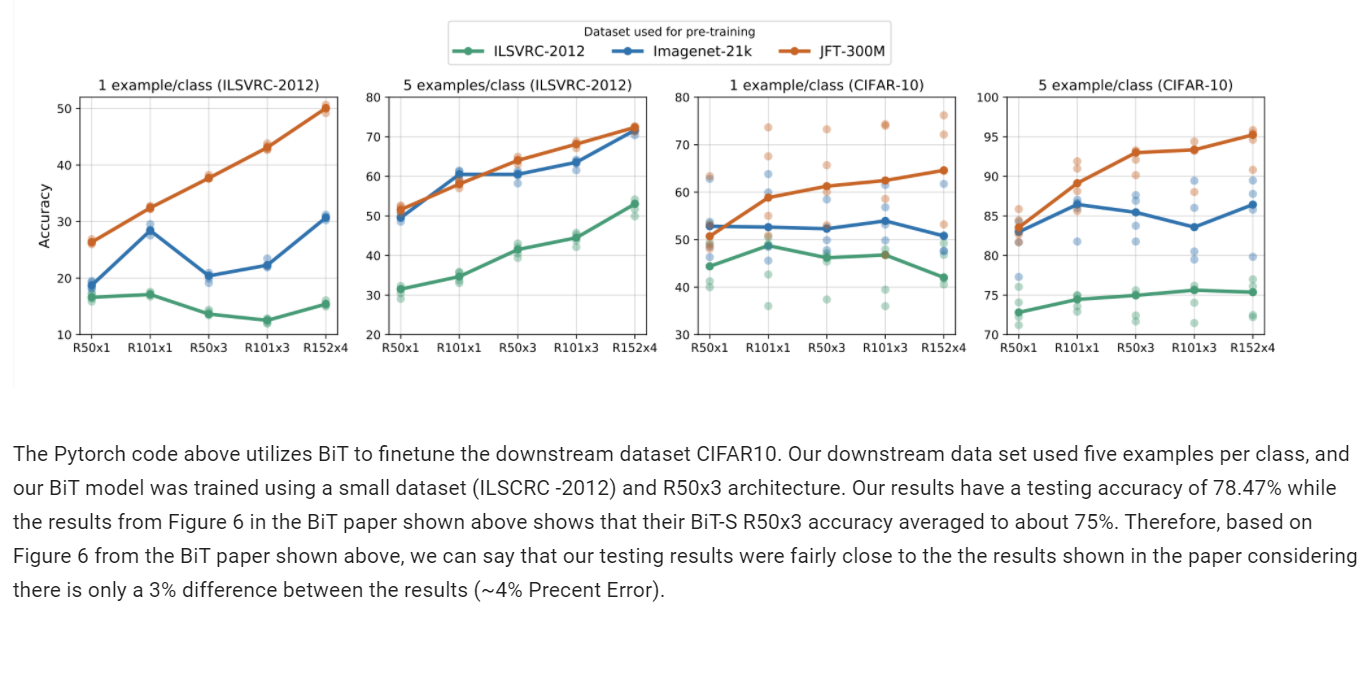